In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### 1. Import the data from `medical_examination.csv` and assign it to the `df` variable

In [14]:
df = pd.read_csv("./medical_examination.csv")
df.head(3)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


### 2. Create the `overweight` column in the `df` variable

- To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [15]:
# assumes weight in kg and height in m
calc_bmi = lambda weight, height: weight / height**2
cm_to_m = lambda x: x / 100

overweight_mask = calc_bmi(df["weight"], cm_to_m(df["height"])) > 25

# 1 for overweight (True) and 0 otherwise (False)
df["overweight"] = overweight_mask.astype(int)

df.head(3)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0


### 3. Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

- Convert the data into long format and create a chart that shows the value counts of the categorical features using `seaborn`'s `catplot()`. The dataset should be split by `Cardio` so there is one chart for each cardio value. 

The chart should look like this
<figure>
    <center> <img src="./examples/Figure_1.png" width="1000"> </center>
</figure>

In [16]:
df[["cholesterol", "gluc"]] = (df[["cholesterol", "gluc"]] > 1).astype(int)
df.head(3)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0


### 4. Draw the Categorical Plot in the `draw_cat_plot` function
### 5. Create a DataFrame for the cat plot using `pd.melt` with values from cholesterol, `gluc`, `smoke`, `alco`, `active`, and `overweight` in the `df_cat` variable.
### 6. Group and reformat the data in `df_cat` to split it by `cardio`. Show the counts of each feature. You will have to rename one of the columns for the `catplot` to work correctly.
### 7. Convert the data into `long` format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import : `sns.catplot()`
### 8. Get the figure for the output and store it in the `fig` variable
### 9. Do not modify the next two lines

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080


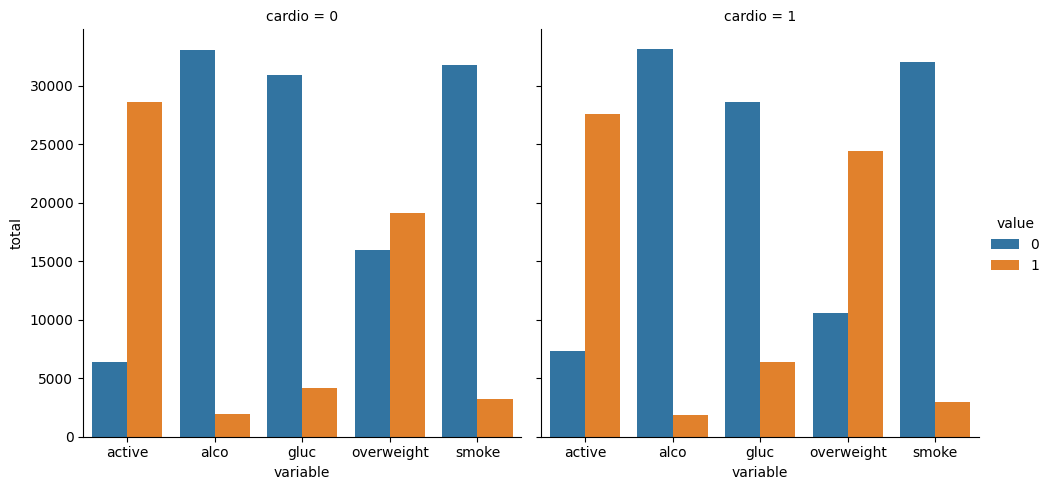

In [17]:
def draw_cat_plot():
    # 5. Create DataFrame for cat plot using `pd.melt` using just the values
    # from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = df.melt(
        id_vars=["cardio"],
        value_vars=[
            "cholesterol",
            "gluc",
            "smoke",
            "alco",
            "active",
            "overweight",
        ],
    )

    # 6. Group and reformat the data to split it by 'cardio'. Show the counts
    # of each feature. You will have to rename one of the collumns for the
    # catplot to work correctly.
    df_cat = (
        df_cat.groupby(["cardio", "variable", "value"]).size().reset_index(name="total")
    )

    ## OR
    ## WRONGGG (why?)
    # df_cat = (
    #     df_cat[["cardio", "variable", "value"]].value_counts().reset_index(name="total")
    # )

    # 7. Draw the catplot with 'sns.catplot()'
    draw = sns.catplot(
        data=df_cat, x="variable", y="total", hue="value", col="cardio", kind="bar"
    )

    ## OR
    # fig = (
    #     sns.catplot(data=df_cat, kind="count", x="variable", hue="value", col="cardio")
    #     .set_ylabels("total")
    #     .fig
    # )

    # 8. Get the figure for the output
    fig = draw.fig

    # 9. Do not modify the next two lines
    fig.savefig("catplot.png")
    return fig

### 10. Draw the Heat Map in the `draw_heat_map` function
### 13. Clean the data in the `df_heat` variable by filtering out the following patient segments that represent incorrect data
- diastolic pressure is higher than systolic (Keep the correct data with `(df['ap_lo'] <= df['ap_hi'])`)
 -  height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
 -  height is more than the 97.5th percentile
 -  weight is less than the 2.5th percentile
 -  weight is more than the 97.5th percentile

### 12. Calculate the correlation matrix and store it in the `corr` variable
### 13. Generate a mask for the upper triangle and store it in the `mask` variable
### 14. Set up the `matplotlib` figure
### 15. Plot the correlation matrix using the method provided by the `seaborn` library import: `sns.heatmap()`
- Mask the upper triangle. The chart should look like this 
<figure>
    <center> <img src="./examples/Figure_2.png" width=800> <center>
</figure>

### 16. Do not modify the next two lines

In [19]:
# 10. Draw Heat Map
def draw_heat_map():
    correct_data_mask = (
        (df["ap_lo"] <= df["ap_hi"])
        & (df["height"] >= df["height"].quantile(0.025))
        & (df["height"] <= df["height"].quantile(0.975))
        & (df["weight"] >= df["weight"].quantile(0.025))
        & (df["weight"] <= df["weight"].quantile(0.975))
    )
    # 11. Clean the data
    df_heat = df[correct_data_mask]

    # 12. Calculate the correlation matrix
    corr = df_heat.corr()

    # 13. Generate a mask for the upper triangle
    mask = np.triu(corr)
    ## OR
    # mask = np.zeros_like(corr)
    # mask[np.triu_indices_from(mask)] = True

    # 14. Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 12))

    # 15. Draw the heatmap with 'sns.heatmap()'
    ax = sns.heatmap(
        data=corr,
        mask=mask,
        annot=True,
        fmt="0.1f",
        square=True,
        cbar_kws={"shrink": 0.45, "format": "%.2f"},
    )

    # 16. Do not modify the next two lines
    fig.savefig("heatmap.png")
    return fig